#### Pass Task 1 - HARPREET SINGH (223925166)

Part 1

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
from sklearn import datasets
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#####  Load data from digitData2.csv file. The last column of each file presents the label and the rest of the columns are features

In [260]:
df = pd.read_csv('digitData2.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [261]:
list(df.iloc[:,-1].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [262]:
print(f"Shape of data:{df.shape}")
print(f"Last Column is the label column with unique values as\n{list(df.iloc[:,-1].unique())}")

Shape of data:(1528, 65)
Last Column is the label column with unique values as
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [263]:
# checking for any null values
df.isna().sum().sum()

0

In [264]:
# separating the label column from features columns in a dataset
X = df.iloc[:,:64]
X.shape

(1528, 64)

In [265]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [266]:
y = df.iloc[:,64]
y.head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: 64, dtype: float64

In [267]:
y.shape

(1528,)

##### 1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
import plotly.express as px

In [269]:
# Standardising the dataset 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [270]:
sl = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=1)
    predict = kmeans.fit_predict(scaled_x)
    score = silhouette_score(scaled_x,predict,random_state=1)
    sl.append(score)
    print(f"For n_clusters = {k},silhouette score :{score}")

For n_clusters = 2,silhouette score :0.10479787793185824
For n_clusters = 3,silhouette score :0.10849405170050018
For n_clusters = 4,silhouette score :0.09839108341526197
For n_clusters = 5,silhouette score :0.11187203416426503
For n_clusters = 6,silhouette score :0.10682006765617225
For n_clusters = 7,silhouette score :0.11831738620823273
For n_clusters = 8,silhouette score :0.13203032485764318
For n_clusters = 9,silhouette score :0.14417492680516547
For n_clusters = 10,silhouette score :0.15202824922244423
For n_clusters = 11,silhouette score :0.1599152343740672
For n_clusters = 12,silhouette score :0.16234691876830346
For n_clusters = 13,silhouette score :0.15591467205255455
For n_clusters = 14,silhouette score :0.1532776297534233


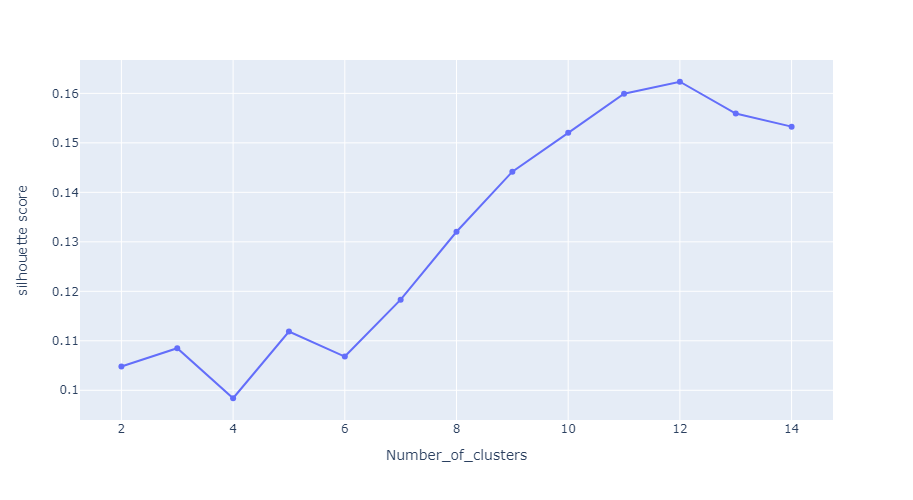

In [271]:
data = pd.DataFrame({'silhouette score':sl,'Number_of_clusters':range(2,15)})
fig = px.line(data, x='Number_of_clusters', y="silhouette score",height=500,width=720,markers=True)
fig.show()

From the above Graph based on SIlhoutte score, Optimal K value to be found is 12

##### 2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.

In [272]:
#Running Kmeans algorithm by using the init method as 'random'
Kmeans = KMeans(n_clusters=12,init='random',random_state=10)
pred = Kmeans.fit_predict(scaled_x)
Kmeans_wcss = Kmeans.inertia_
silhoutte_score_kmeans = silhouette_score(scaled_x,pred,random_state=1)
# print(f"Silhoutte score for Kmeans:{silhoutte_score_kmeans}")
# print(f"Mean distortion for Kmeans:{Kmeans_wcss}")
davies_bouldin_score_kmeans = davies_bouldin_score(scaled_x,Kmeans.labels_)



#Running Kmeans algorithm by using the init method as 'k-means++'
Kmeans_plus = KMeans(n_clusters=12,init='k-means++',random_state=1)
pred_plus = Kmeans_plus.fit_predict(scaled_x)
Kmeans_plus_wcss = Kmeans_plus.inertia_
silhoutte_score_kmeans_plus = silhouette_score(scaled_x,pred_plus,random_state=1)
davies_bouldin_score_kmeans_plus = davies_bouldin_score(scaled_x,Kmeans_plus.labels_)

# print(f"Silhoutte score for Kmeans-plus:{silhoutte_score_kmeans_plus}")
# print(f"Mean distortion for Kmeans-plus:{Kmeans_plus_wcss}")

results = pd.DataFrame({'Algorithm':['KMeans','KMeans++'],
              'Silhoutte score':[silhoutte_score_kmeans,silhoutte_score_kmeans_plus],
             'Mean distortion':[Kmeans_wcss,Kmeans_plus_wcss],
                       'davies_bouldin_score':[davies_bouldin_score_kmeans,davies_bouldin_score_kmeans_plus]})
results

,Algorithm,Silhoutte score,Mean distortion,davies_bouldin_score
0,KMeans,0.160493,54454.698629,1.710774
1,KMeans++,0.162347,54535.867508,1.657084


KMeans++ has A lower score (davies_bouldin_score) signifies better-defined clusters.<br>
KMeans++ has A greater score (silhoutte_score) signifies better-defined clusters.

<br>

##### 3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).

In [273]:
#Running Kmeans algorithm by using the init method as 'random' and n_init=50
Kmeans = KMeans(n_clusters=12,init='random',random_state=10,n_init=50)
pred = Kmeans.fit_predict(scaled_x)
Kmeans_wcss = Kmeans.inertia_
silhoutte_score_kmeans = silhouette_score(scaled_x,pred,random_state=1)
# print(f"Silhoutte score for Kmeans:{silhoutte_score_kmeans}")
# print(f"Mean distortion for Kmeans:{Kmeans_wcss}")
davies_bouldin_score_kmeans = davies_bouldin_score(scaled_x,Kmeans.labels_)



#Running Kmeans algorithm by using the init method as 'k-means++' and n_init=50
Kmeans_plus = KMeans(n_clusters=12,init='k-means++',random_state=1,n_init=50)
pred_plus = Kmeans_plus.fit_predict(scaled_x)
Kmeans_plus_wcss = Kmeans_plus.inertia_
silhoutte_score_kmeans_plus = silhouette_score(scaled_x,pred_plus,random_state=1)
davies_bouldin_score_kmeans_plus = davies_bouldin_score(scaled_x,Kmeans_plus.labels_)

# print(f"Silhoutte score for Kmeans-plus:{silhoutte_score_kmeans_plus}")
# print(f"Mean distortion for Kmeans-plus:{Kmeans_plus_wcss}")

results = pd.DataFrame({'Algorithm':['KMeans','KMeans++'],
              'Silhoutte score':[silhoutte_score_kmeans,silhoutte_score_kmeans_plus],
             'Mean distortion':[Kmeans_wcss,Kmeans_plus_wcss],
                       'davies_bouldin_score':[davies_bouldin_score_kmeans,davies_bouldin_score_kmeans_plus]})
results

,Algorithm,Silhoutte score,Mean distortion,davies_bouldin_score
0,KMeans,0.167863,54016.906149,1.700489
1,KMeans++,0.167124,54330.756834,1.640317


silhouette_score for kmeans++ is decreased now as compared to previous silhouette_score

<br>

##### 4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions

For epsilon,we use the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.<br>The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph<br><br>DBSCAN is very sensitive to the values of epsilon and minPoints. Therefore, it is very important to understand how to select the values of epsilon and minPoints. A slight variation in these values can significantly change the results produced by the DBSCAN algorithm.

The value of minPoints should be at least one greater than the number of dimensions of the dataset, i.e., 

In [274]:
from sklearn.cluster import DBSCAN

In [275]:
# db = DBSCAN(eps=3)
# db.fit(scaled_x)
# print(np.unique(db.labels_))
# print(np.sum(np.unique(db.labels_) != -1))

In [276]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(scaled_x)
distances, indices = nbrs.kneighbors(scaled_x)

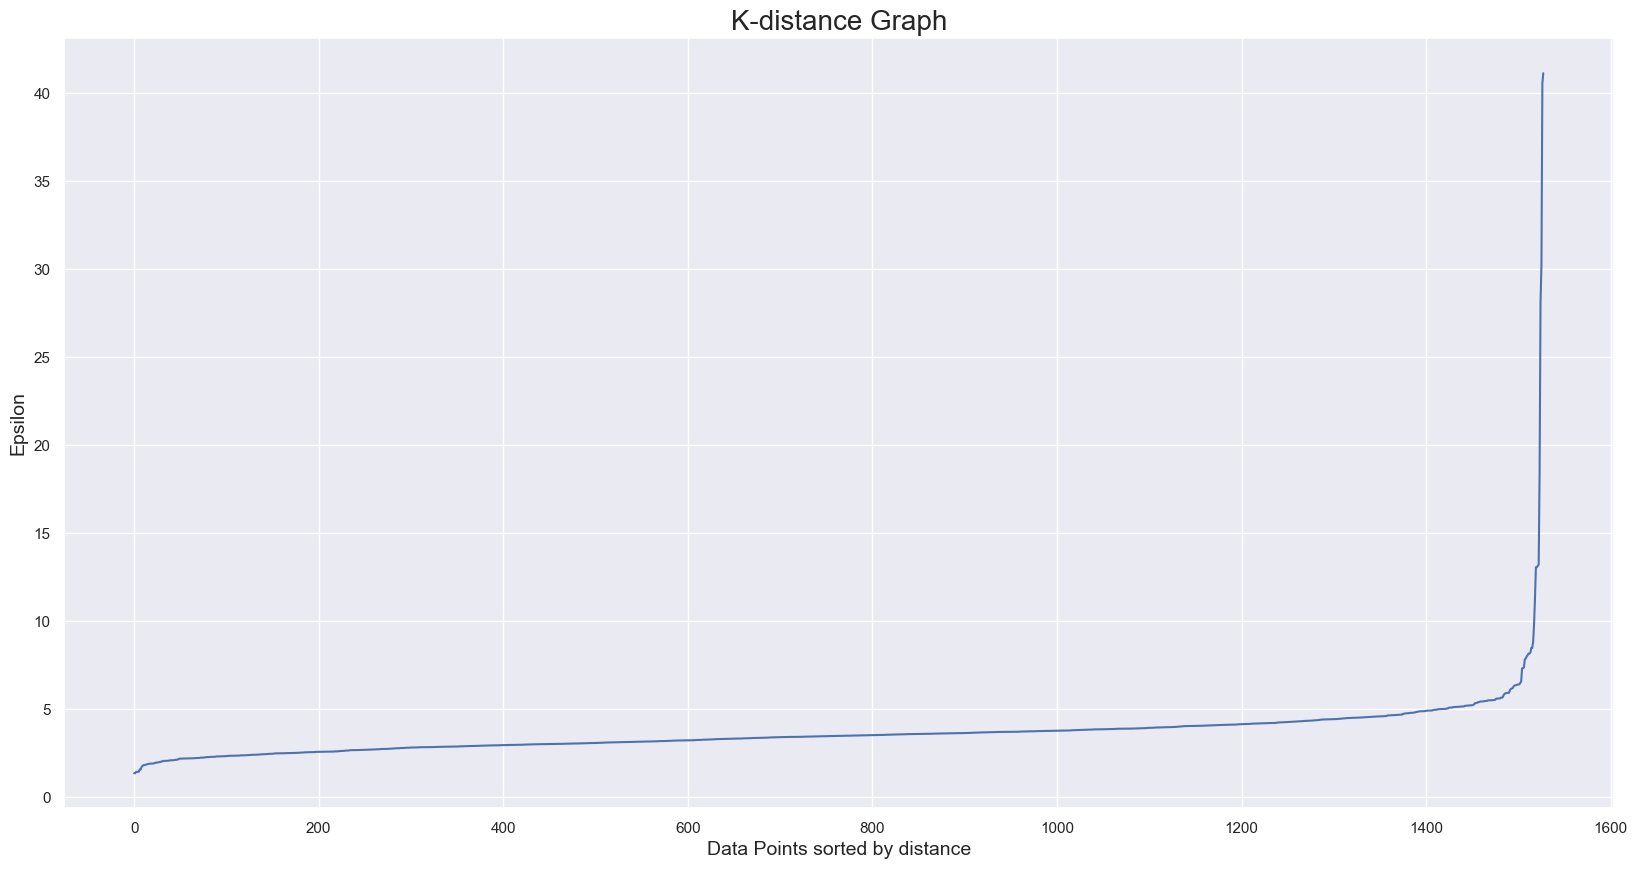

In [277]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
# fig = px.line(x=range(scaled_x.shape[0]), y=distances)
# fig.show()

from above graph, optimal value of epsilon comes close 5.5

In [278]:
db = DBSCAN(eps=5.4,min_samples=64)
db.fit(scaled_x)
print(f"unique lables: {np.unique(db.labels_)[1:]}")
# print(np.sum(np.unique(db.labels_) != -1))

unique lables: [0 1 2 3]


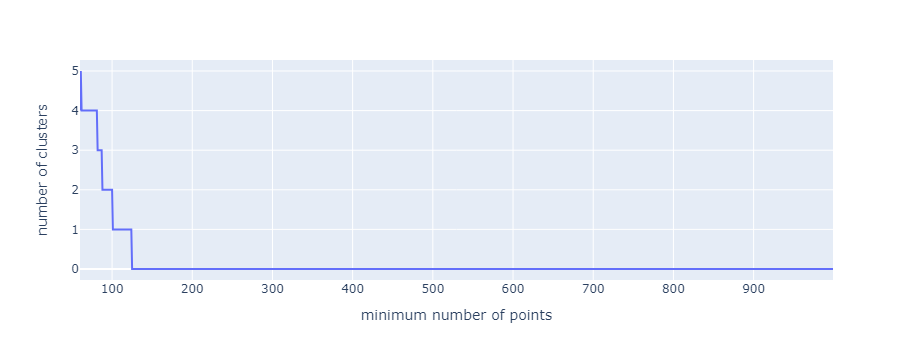

In [279]:
outlier_percent = []
number_of_outliers = []
number_of_clusters = []
# x = np.arange(1,10,0.1)
x1 = np.arange(60,1000,1)


for x in x1:
    dbscan = DBSCAN(eps=5.5,min_samples=x)
    dbscan.fit(scaled_x)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) *100
    
    outlier_percent.append(perc_outliers)
    number_of_clusters.append(np.sum(np.unique(dbscan.labels_) != -1))
    
    
# sns.lineplot(x = x,y = outlier_percent)
# plt.xlim(6,8)
import plotly.express as px
fig = px.line(x=x1, y=number_of_clusters,labels={"x":"minimum number of points","y":"number of clusters"})
fig.show()

We are able to get 4 clusters using the epsilon 5.5 and minimum number of points 64

<br>

##### Part 2

##### Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data.

In [280]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes.keys()
diabetes_df = diabetes['frame']
diabetes_df.head()

print(f"Dimension of the dataset:{diabetes_df.shape}")

# defining a function to convert the numeric sex colum to category column value
def map_value(value):
    if value > 0:
        return 0
    else:
        return 1

# Converting the target column into diabetes (Yes-1) or (No-0) based on target vale > 150 or less than 150
def map_diabetes_value(value):
    if value > 150:
        return 1
    else:
        return 0
    
diabetes_df['diabetes'] = diabetes_df['target'].apply(map_diabetes_value).astype('int')


diabetes_df.head()

Dimension of the dataset:(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [281]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [282]:
#PCA for n=3
pca = PCA(n_components=3)

In [283]:
pca_transform_df = pca.fit_transform(diabetes_df.drop(columns = ['target','diabetes']))

In [284]:
# Merging the transform data on Principal componets with the original dataset
diabetes_df['PC_1'] = pca_transform_df[:,0]
diabetes_df['PC_2'] = pca_transform_df[:,1]
diabetes_df['PC_3'] = pca_transform_df[:,2]
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes,PC_1,PC_2,PC_3
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1,0.027931,-0.092601,0.028027
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0,-0.134686,0.065263,0.001328
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0,0.012945,-0.077764,0.035164
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1,0.002345,0.018182,-0.095750
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0,-0.035981,0.038621,-0.002724


<br>

##### 1. What is the variance (%) covered by the first 3 components? How is this percentage of variance computed?

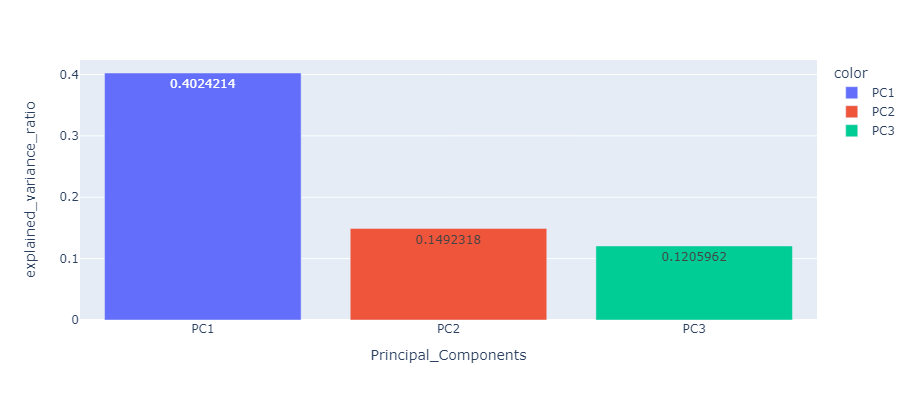

In [285]:
fig = px.bar(x=['PC1','PC2','PC3'], y=pca.explained_variance_ratio_,
             labels={'x':'Principal_Components','y':'explained_variance_ratio'},
             height=400,width=500,color = ['PC1','PC2','PC3'],text_auto=True)
fig.show()

PC1 captures 40 % of varinace in data<br>
PC2 captures 15 % of variance in data<br>
PC3 captures 12% variance in the data

<br>

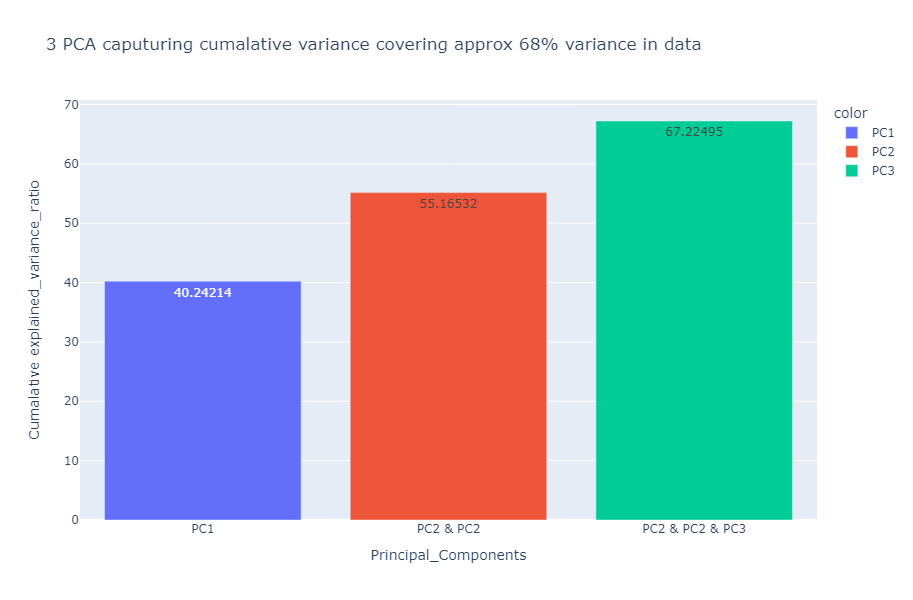

In [307]:
fig = px.bar(x=['PC1','PC2 & PC2','PC2 & PC2 & PC3'], y=pca.explained_variance_ratio_.cumsum() * 100,
             labels={'x':'Principal_Components','y':'Cumalative explained_variance_ratio'},
             height=600,width=700,color = ['PC1','PC2','PC3'],text_auto=True,
             title='3 PCA caputuring cumalative variance covering approx 68% variance in data')
fig.show()


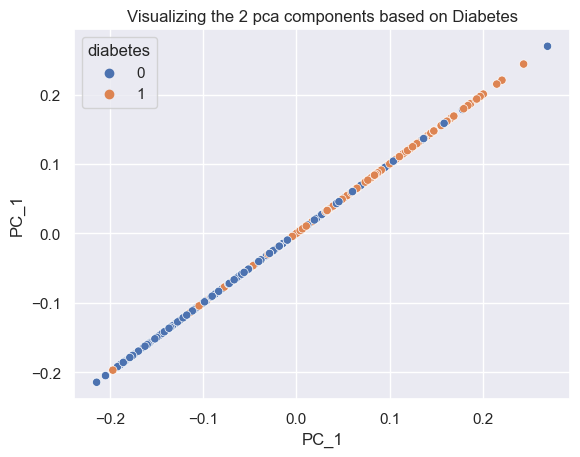

In [310]:
# Visualizing the 2 pca components based on Diabetes using seaborn 
sns.scatterplot(data = diabetes_df,
               x = diabetes_df['PC_1'],
               y = diabetes_df['PC_1'],
               hue = diabetes_df['diabetes'])
plt.title('Visualizing the 2 pca components based on Diabetes');


In [315]:
# Visualizing  first 2 PCA components based on diabetes using plotly in 3d

# import plotly.express as px
fig = px.scatter_3d(diabetes_df, x='PC_2', y='PC_2', z='diabetes',
              color='diabetes',
                 width=800,height=600,title = 'Plot showing PCA components based on diabetes')
fig.show()

In [316]:
# Visualizing the all PCA components based on Diabetes using plotly 

# import plotly.express as px
fig = px.scatter_3d(diabetes_df, x='PC_2', y='PC_2', z='PC_3',
              color='diabetes',
                 width=800,height=700,title = 'Plot showing all PCA components based on diabetes')
fig.show()

##### 2. Is there any correlation between these three components?

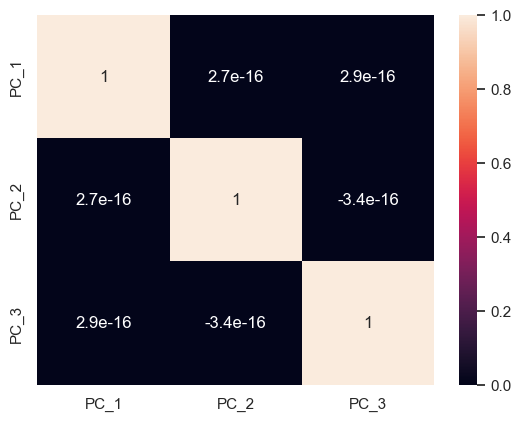

In [317]:
sns.heatmap(diabetes_df.iloc[:,-3:].corr(),annot = True);

From above graph, it shows that there is no correllation between the components

##### 3. Apply t-SNE on the same dataset, select the first 3 components and plot them.

In [318]:
from sklearn.manifold import TSNE

In [319]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes.keys()
diabetes_df_ts = diabetes['frame']
diabetes_df_ts.head()

print(f"Dimension of the dataset:{diabetes_df.shape}")

# defining a function to convert the numeric sex colum to category column value
def map_value(value):
    if value > 0:
        return 0
    else:
        return 1

    
# Converting the target column into diabetes (Yes-1) or (No-0) based on target vale > 150 or less than 150

def map_diabetes_value(value):
    if value > 150:
        return 1
    else:
        return 0
    
    


diabetes_df_ts['diabetes'] = diabetes_df_ts['target'].apply(map_diabetes_value).astype('int')


diabetes_df_ts.head()



Dimension of the dataset:(442, 15)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [320]:
diabetes_df_updated = diabetes_df_ts.copy()
diabetes_df_updated.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0


In [321]:
diabetes_df_updated.drop(columns=['target'],inplace = True)
diabetes_df_updated.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0


In [322]:
diabetes_df_updated['diabetes'].value_counts()

0    242
1    200
Name: diabetes, dtype: int64

In [323]:
# diabetes_df_updated.iloc[:,:-1]

In [324]:
# Applying tsne using first 3 components
tsne = TSNE(n_components=3,random_state=42)
diabetes_tsne_transfom_df_predictors = tsne.fit_transform(diabetes_df_updated.iloc[:,:-1])
diabetes_tsne_transfom_df_predictors = pd.DataFrame(diabetes_tsne_transfom_df_predictors,columns=['tsn1','tsn2','tsn3'])
diabetes_tsne_transfom_df_predictors.head()



,tsn1,tsn2,tsn3
0,-65.880630,100.109970,26.341137
1,34.693195,20.111155,83.491890
2,-23.018808,51.337734,-85.507294
3,76.937759,-10.295616,-14.075912
4,22.845461,-13.064571,36.848789


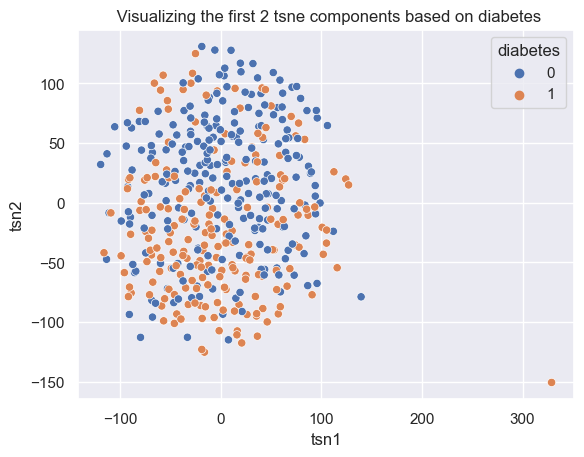

In [325]:
# Visualizing the first 2 tsne components based on diabetes using seaborn 
sns.scatterplot(data = diabetes_tsne_transfom_df_full,
               x = diabetes_tsne_transfom_df_full['tsn1'],
               y = diabetes_tsne_transfom_df_full['tsn2'],
               hue = diabetes_tsne_transfom_df_full['diabetes'])
plt.title(' Visualizing the first 2 tsne components based on diabetes')
plt.show();




In [326]:
# Visualizing the first 2 tsne components based on diabetes using plotly 

# import plotly.express as px
fig = px.scatter_3d(diabetes_tsne_transfom_df_full, x='tsn1', y='tsn2', z='diabetes',
              color='diabetes',
                 width=800,height=700,title = 'Plot showing tsne components based on diabetes')
fig.show()

From above 3d plot, we can see that TSNE is able to capture enough variance and able to distinguih between diabetes

In [327]:
# Visualizing the all 3 tsne components based on diabetes using plotly 

# import plotly.express as px
fig = px.scatter_3d(diabetes_tsne_transfom_df_full, x='tsn1', y='tsn2', z='tsn3',
              color='diabetes',
                 width=800,height=700,title = 'Plot showing tsne components based on diabetes')
fig.show()

<br>

<br>

##### 4. Report the comparison between the results obtained using t-SNE and PCA

In [328]:
result = pd.concat([diabetes_df,diabetes_tsne_transfom_df_full],axis = 1)
# result.head()

result = result[['PC_1', 'PC_2', 'PC_3', 'tsn1', 'tsn2', 'tsn3', 'diabetes']]
result = result.iloc[:,:-1]
print('Comparing the result set of PCA and TSNE components based on diabetes feature')
result.head()

Comparing the result set of PCA and TSNE components based on diabetes feature


,PC_1,PC_2,PC_3,tsn1,tsn2,tsn3,diabetes
0,0.027931,-0.092601,0.028027,-65.880630,100.109970,26.341137,1
1,-0.134686,0.065263,0.001328,34.693195,20.111155,83.491890,0
2,0.012945,-0.077764,0.035164,-23.018808,51.337734,-85.507294,0
3,0.002345,0.018182,-0.095750,76.937759,-10.295616,-14.075912,1
4,-0.035981,0.038621,-0.002724,22.845461,-13.064571,36.848789,0


In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

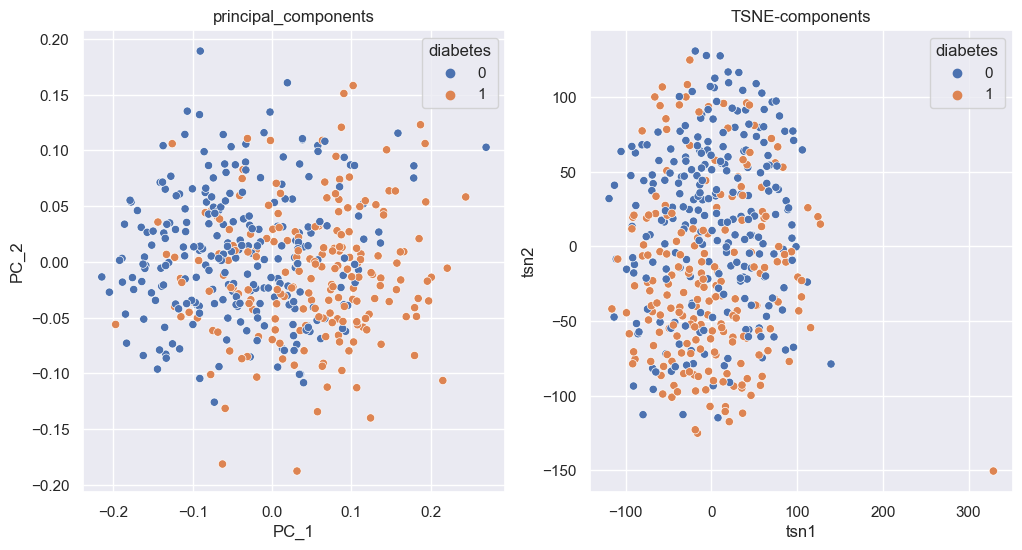

In [330]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.scatterplot(data =result,x = result['PC_1'],y = result['PC_2'],hue = 'diabetes')
plt.title('principal_components')
plt.subplot(1,2,2)
sns.scatterplot(data =result,x = result['tsn1'],y = result['tsn2'],hue = 'diabetes')
plt.title('TSNE-components');

Principal Components are more cluttered towards zero while TSNE components are more spread away from zero<br>PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space<br>PCA  performs better than t-SNE as this is a smaller-sized data.<br>Both TSNA and PCA components are able to distinguish between 2 classes of diabetes

<br>

#### References

https://hastie.su.domains/ISLP/ISLP_website.pdf<br>https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/<br>https://www.bioinformatics.babraham.ac.uk/training/10XRNASeq/Dimension%20Reduction.pdf<br>http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html<br>https://www.educba.com/density-based-clustering/<br>https://plotly.com/graphing-libraries/<br>https://seaborn.pydata.org/index.html